# Explore data

Once the original data has been transformed and readied for analysis, we can explore it and obtain some initial statistics.

#### Purpose

In this notebook we are going to obtain initial statistics from data and generate TEX source code for the article.

----

#### Load data

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff

# Load data with missing data (numeric form)
data = pd.read_csv("../data/data_numerical.csv", sep=",")
data = data.replace("?", np.nan)
print(data.shape)

(402, 30)


## 1 - Describe data

### 1.1 - MDS-NMS

In [2]:
mds_nms_names=["depression", "anxiety", "apathy", "psychosis", "impulse_control", "cognition", "hypotension",
               "urinary", "sexual", "gastrointestinal", "sleep", "pain", "weight_loss", "smell", 
               "physical_tiredness", "mental_fatigue", "sweating"]

In [3]:
data[mds_nms_names] = data[mds_nms_names].astype("float64")
data[mds_nms_names].describe(percentiles=[]).round(2).transpose()

print(data[mds_nms_names].describe(percentiles=[]).round(2).transpose().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  count &  mean &   std &  min &   50\% &   max \\
\midrule
depression         &  401.0 &  0.07 &  0.13 &  0.0 &  0.01 &  0.90 \\
anxiety            &  402.0 &  0.09 &  0.13 &  0.0 &  0.03 &  0.84 \\
apathy             &  402.0 &  0.08 &  0.15 &  0.0 &  0.00 &  0.75 \\
psychosis          &  402.0 &  0.03 &  0.06 &  0.0 &  0.00 &  0.56 \\
impulse\_control    &  401.0 &  0.02 &  0.05 &  0.0 &  0.00 &  0.39 \\
cognition          &  402.0 &  0.10 &  0.12 &  0.0 &  0.05 &  0.69 \\
hypotension        &  402.0 &  0.07 &  0.13 &  0.0 &  0.00 &  0.75 \\
urinary            &  402.0 &  0.16 &  0.19 &  0.0 &  0.08 &  1.00 \\
sexual             &  375.0 &  0.14 &  0.25 &  0.0 &  0.00 &  1.00 \\
gastrointestinal   &  401.0 &  0.10 &  0.12 &  0.0 &  0.06 &  0.73 \\
sleep              &  401.0 &  0.12 &  0.12 &  0.0 &  0.08 &  0.79 \\
pain               &  402.0 &  0.13 &  0.15 &  0.0 &  0.08 &  0.83 \\
weight\_loss        &  402.0 &  0.06 &  0.18 &  0.0 &  0.00 &

### 1.2 - MDS-UPDRS

In [4]:
mds_updrs_names=["tremor", "rigidity", "dyskinesias", "fluctuations", "bradykinesia", "axial_no_pigd", "pigd"]

In [5]:
data[mds_updrs_names] = data[mds_updrs_names].astype("float64")
data[mds_updrs_names].describe(percentiles=[]).round(2).transpose()

print(data[mds_updrs_names].describe(percentiles=[]).round(2).transpose().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  count &  mean &   std &  min &   50\% &   max \\
\midrule
tremor        &  391.0 &  0.13 &  0.12 &  0.0 &  0.11 &  0.57 \\
rigidity      &  398.0 &  0.19 &  0.16 &  0.0 &  0.15 &  1.00 \\
dyskinesias   &  402.0 &  0.07 &  0.15 &  0.0 &  0.00 &  1.00 \\
fluctuations  &  401.0 &  0.16 &  0.19 &  0.0 &  0.06 &  0.81 \\
bradykinesia  &  394.0 &  0.29 &  0.17 &  0.0 &  0.25 &  0.89 \\
axial\_no\_pigd &  402.0 &  0.23 &  0.15 &  0.0 &  0.21 &  0.86 \\
pigd          &  393.0 &  0.22 &  0.19 &  0.0 &  0.15 &  0.85 \\
\bottomrule
\end{tabular}



## 2 - Correlation

In [6]:
symptom_columns = mds_nms_names + mds_updrs_names

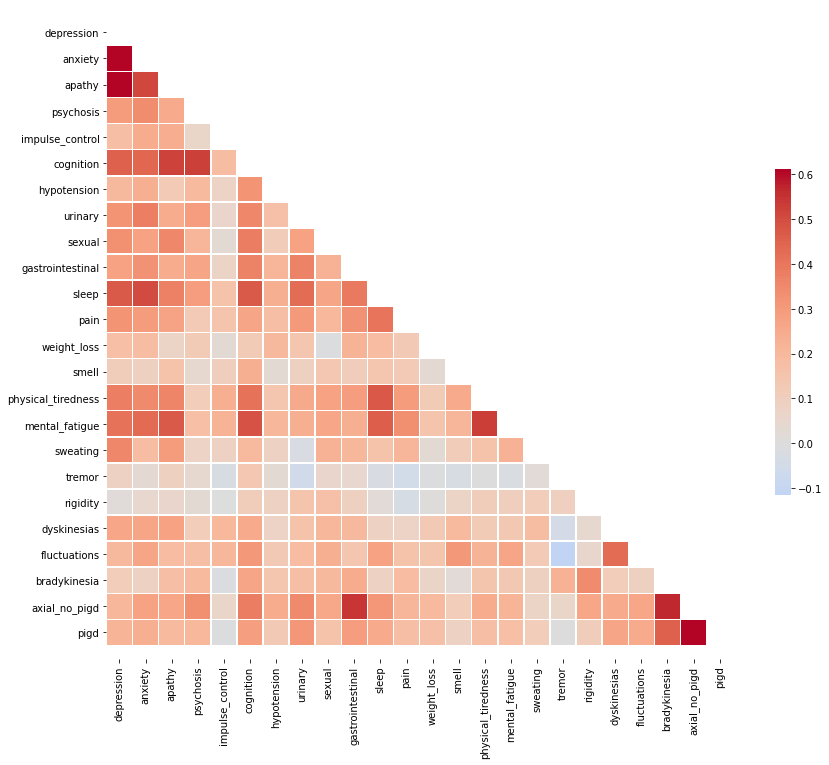

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

all_corr = data[symptom_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = "coolwarm"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(all_corr, mask=mask, cmap=cmap, vmax=.61, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig("corr_heatmap.pdf", format="pdf", bbox_inches='tight')